<a href="https://colab.research.google.com/github/mostafadentist/python-ipynb/blob/main/Phylogenetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

sequences = [
    SeqRecord(Seq("ATGCGTAC"), id="Species1"),
    SeqRecord(Seq("ATGCCGAC"), id="Species2"),
    SeqRecord(Seq("ATGCGTAT"), id="Species3"),
    SeqRecord(Seq("ATCCGTAC"), id="Species4")
]

SeqIO.write(sequences, "sequences.fasta", "fasta")
print("Saved sequences to FASTA file.")

Saved sequences to FASTA file.


In [92]:
from itertools import combinations

def p_distance(seq1, seq2):
    mismatches = sum(a!=b for a,b in zip(seq1, seq2))
    return mismatches / len(seq1)

for (s1, rec1), (s2, rec2) in combinations(enumerate(sequences), 2):
    print(rec1.id, "-", rec2.id, ":", p_distance(rec1.seq, rec2.seq))

Species1 - Species2 : 0.25
Species1 - Species3 : 0.125
Species1 - Species4 : 0.125
Species2 - Species3 : 0.375
Species2 - Species4 : 0.375
Species3 - Species4 : 0.25


In [94]:
from Bio.Align import MultipleSeqAlignment

alignment = MultipleSeqAlignment(sequences)  # wrap sequences into MSA
dm = calculator.get_distance(alignment)
print(dm)

Species1    0.000000
Species2    0.250000    0.000000
Species3    0.125000    0.375000    0.000000
Species4    0.125000    0.375000    0.250000    0.000000
    Species1    Species2    Species3    Species4


In [95]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import Bio.Phylo as Phylo

constructor = DistanceTreeConstructor()
upgma_tree = constructor.upgma(dm)

Phylo.draw_ascii(upgma_tree)

  ____________________________________________________________________ Species2
_|
 |                               _____________________________________ Species3
 |______________________________|
                                |            _________________________ Species4
                                |___________|
                                            |_________________________ Species1



In [96]:
nj_tree = constructor.nj(dm)
Phylo.draw_ascii(nj_tree)

 , Species1
 |
 |____________________________________________________________________ Species2
_|
 |_________________________________ Species3
 |
 |_________________________________ Species4



<Figure size 600x600 with 0 Axes>

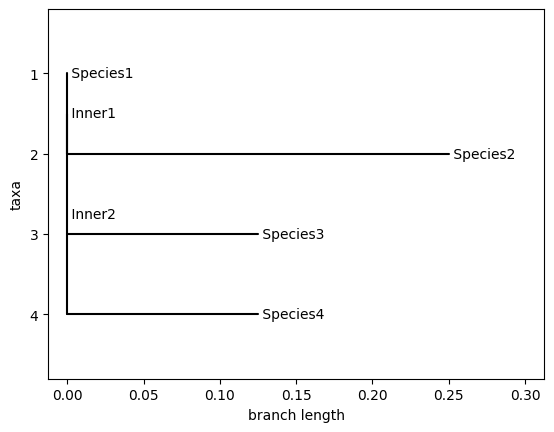

In [97]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
Phylo.draw(nj_tree, do_show=False)
plt.show()

In [98]:
Phylo.write(nj_tree, "phylo_tree.newick", "newick")
print("Tree saved in Newick format.")

Tree saved in Newick format.
